# Sieci neuronowe i Deep Learning
# Temat 4: Biblioteka PyTorch - wprowadzenie

In [5]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] numpy 1.26.4
[FAIL] matplotlib 3.8.3, please upgrade to 3.4.3 >= matplotlib <= 3.8
[OK] torch 2.2.1+cpu


In [3]:
# from IPython.display import Image as IPythonImage
# %matplotlib inline

## Wprowadzenie do biblioteki PyTorch

### Instalacja biblioteki PyTorch
W razie problemów z instalacją, sprawdzić aktualne instrukcje na https://pytorch.org (https://pytorch.org/get-started/locally/).

In [1]:
# Instalacja PyTorch z repozytorium PyPI:
! pip install torch
# ! pip install torch==1.9.0

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 2.2.1+cpu


### Tworzenie tensorów w PyTorch

In [2]:
# Tworzenie tensorów z listy lub NumPy array:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [4]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [5]:
t_ones = torch.ones(2, 3)  # Funkcja tworzy tensor wypełniony wartościami 1 o rozmiarach określonych przez jej argumenty

t_ones.shape

torch.Size([2, 3])

In [6]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
rand_tensor = torch.rand(4,3,2)  # Tensor z losowych elementów

print(rand_tensor)

tensor([[[0.5606, 0.0961],
         [0.9669, 0.8550],
         [0.1902, 0.0520]],

        [[0.6542, 0.9940],
         [0.8135, 0.4176],
         [0.8895, 0.6050]],

        [[0.2064, 0.6841],
         [0.9361, 0.1653],
         [0.5963, 0.2012]],

        [[0.6578, 0.9604],
         [0.2093, 0.5439],
         [0.1601, 0.6853]]])


### Operacje na typach tensorów i ich kształtach oraz rozmiarach

In [8]:
print(t_a.dtype)

torch.int64


In [9]:
# Zmiana typu tensor na inny (torch.to()):
t_a_new = t_a.to(torch.int32)

print(t_a_new.dtype)

torch.int32


Wszystkie typy danych: https://pytorch.org/docs/stable/tensor_attributes.html.

Poniżej przedstawiono jak wykonywać przykładowe
operacja na rzędzie (rank) i rozmiarach (shape) tensorów.

In [10]:
t = torch.rand(3, 5)
 
t_tr = torch.transpose(t, 0, 1) # Transpozycja tensora t przez zamianę
                                # jego pierwszego wymiaru (o indeksie 0)
                                # z drugim wymiarem (o indeksie 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [11]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)  # Zmiana kształtu z 1D na 2D

print(t_reshape.shape)

torch.Size([5, 6])


In [12]:
print(t)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])


In [13]:
print(t_reshape)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [14]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)  # Usuwamy wymiary (tutaj o indeksie 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


In [15]:
print(t_sqz)

tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])


### Przykładowe działania matematyczne na tensorach

In [16]:
# torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1  # torch.rand() generuje liczby z rozkładu jednostajnego na [0, 1)
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [17]:
print(t2)

tensor([[-0.5128,  0.1224],
        [-0.7664,  0.8702],
        [-0.8343, -1.4925],
        [-1.8010,  0.9749],
        [ 1.1804,  1.5798]])


In [18]:
print(t1)

tensor([[-0.8968,  0.6631],
        [ 0.3278, -0.6019],
        [ 0.2932, -0.4616],
        [ 0.7838,  0.5714],
        [ 0.4012,  0.7580]])


In [19]:
0.0431 *0.5242

0.02259302

In [20]:
t3 = torch.multiply(t1, t2)  # Mnożenie element * element
print(t3)

tensor([[ 0.4599,  0.0812],
        [-0.2512, -0.5238],
        [-0.2446,  0.6890],
        [-1.4116,  0.5571],
        [ 0.4736,  1.1976]])


In [21]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([0.1818, 0.1858])


Analogicznie działają na przykład funkcje torch.sum(), torch.std().

In [22]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))  # Mnożenie t_1 razy t_2^T

print(t5)

tensor([[ 0.5410,  1.2643, -0.2415,  2.2615, -0.0110],
        [-0.2418, -0.7750,  0.6248, -1.1772, -0.5639],
        [-0.2068, -0.6264,  0.4444, -0.9781, -0.3832],
        [-0.3320, -0.1034, -1.5067, -0.8545,  1.8280],
        [-0.1130,  0.3522, -1.4660,  0.0165,  1.6711]])


In [23]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)  # Mnożenie t_1^T razy t_2

print(t6)

tensor([[-0.9740,  1.1359],
        [ 0.3721,  2.0010]])


In [24]:
# Liczenie normy L^p dla tensora, np. norma l^2 dla tensora t1:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)  # dim=1 określa wymiar, wzdłuż którego ma być obliczana norma
                                               # (obliczamy normę dla każdego wiersza niezależnie)

print(norm_t1)

tensor([1.1153, 0.6854, 0.5469, 0.9700, 0.8576])


In [25]:
print(t1)

tensor([[-0.8968,  0.6631],
        [ 0.3278, -0.6019],
        [ 0.2932, -0.4616],
        [ 0.7838,  0.5714],
        [ 0.4012,  0.7580]])


In [26]:
# Dla sprawdzenia, wprost, używając funkcji z NumPy:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([1.115, 0.685, 0.547, 0.97 , 0.858], dtype=float32)

### Dzielenie i łączenie tensorów

Funkcja **torch.chunk()** dzieli tensor na tensory o równym rozmiarze;

chunks = liczba podziałów,

dim = wymiar, wzdłuż którego robiony jest podział.

In [27]:
t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, chunks=2)

[item.numpy() for item in t_splits]

tensor([0.3694, 0.1190, 0.3516, 0.5650, 0.0653, 0.9575])


[array([0.369, 0.119, 0.352], dtype=float32),
 array([0.565, 0.065, 0.958], dtype=float32)]

In [28]:
t = torch.rand(6, 8)

print(t)

t_splits = torch.chunk(t, chunks=2, dim=0)

[item.numpy() for item in t_splits]

tensor([[0.3298, 0.0818, 0.2917, 0.1643, 0.3415, 0.6725, 0.7725, 0.4043],
        [0.5031, 0.5306, 0.8208, 0.6085, 0.0160, 0.1587, 0.1489, 0.3788],
        [0.1625, 0.4053, 0.8426, 0.0928, 0.2127, 0.9380, 0.6634, 0.4602],
        [0.2433, 0.9376, 0.2411, 0.6825, 0.3461, 0.4457, 0.8518, 0.8577],
        [0.4255, 0.8126, 0.3108, 0.8529, 0.2215, 0.2208, 0.8803, 0.6251],
        [0.9563, 0.0201, 0.0993, 0.0809, 0.2306, 0.2101, 0.6880, 0.2764]])


[array([[0.33 , 0.082, 0.292, 0.164, 0.341, 0.673, 0.772, 0.404],
        [0.503, 0.531, 0.821, 0.608, 0.016, 0.159, 0.149, 0.379],
        [0.163, 0.405, 0.843, 0.093, 0.213, 0.938, 0.663, 0.46 ]],
       dtype=float32),
 array([[0.243, 0.938, 0.241, 0.683, 0.346, 0.446, 0.852, 0.858],
        [0.426, 0.813, 0.311, 0.853, 0.221, 0.221, 0.88 , 0.625],
        [0.956, 0.02 , 0.099, 0.081, 0.231, 0.21 , 0.688, 0.276]],
       dtype=float32)]

Używając funkcji **torch.split()**,
można podać rozmiary tensorów z podziału.

In [29]:
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
 
[item.numpy() for item in t_splits]

tensor([0.5876, 0.9704, 0.3728, 0.3127, 0.9047])


[array([0.588, 0.97 , 0.373], dtype=float32),
 array([0.313, 0.905], dtype=float32)]

Funkcje
**torch.stack()** i **torch.cat()**
dają możliwość łączenia tensorów w jeden większy tensor.

In [30]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)  # axis=0 określa wymiar, wzdłuż którego
                               # tensory mają być połączone (wartość 0: wzdłuż pierwszego wymiaru)

print(A)
print(B)
print(C)

tensor([1., 1., 1.])
tensor([0., 0.])
tensor([1., 1., 1., 0., 0.])


In [31]:
A = torch.ones(3,4)
B = torch.zeros(3,4)

C = torch.cat([A, B], axis=1)  # axis=0 określa wymiar, wzdłuż którego
                               # tensory mają być połączone (wartość 0: wzdłuż pierwszego wymiaru)

print(A)
print(B)
print(C)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])


Funkcja **torch.stack()** w PyTorch służy do łączenia sekwencji tensorów wzdłuż nowego wymiaru. Wszystkie tensory w sekwencji muszą mieć ten sam kształt.

In [32]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
T = torch.stack([A, B], axis=0)

print(A)
print(B)

print(S)
print(T)

tensor([1., 1., 1.])
tensor([0., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([[1., 1., 1.],
        [0., 0., 0.]])


Dokumentacja biblioteki PyTorch:
https://pytorch.org/docs/stable/index.html.

## Programowanie procedury ładowania danych w PyTorch

### Ładowanie danych z istniejącego tensora

Jeśli mamy dane w postaci tensorów, list Python lub tablic NumPy,
moduł wczytujący dane można w łatwy posób utworzyć, używając klasy
**torch.utils.data.DataLoader** (klasa DataLoader z modułu torch.utils.data w bibliotece PyTorch).

Obiekt klasy **DataLoader** umożliwia iterowanie po elementach wejściowego zbioru danych.

In [33]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [34]:
print(t)

tensor([0., 1., 2., 3., 4., 5.])


In [35]:
# Iterujemy element po elemencie:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [36]:
# Można podawać w batchach (tutaj powstaną dwa batche):
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):  # enumerate() jest używana do śledzenia indeksu partii
                                            # (numeracji partii zaczynającej się od 1 dzięki argumentowi 1)
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Łączenie tensorów w jeden zbiór danych
Mamy np. tensor z cechami i tensor z etykietami. Potrzebujemy stworzyć zbiór danych poprzez połączenie tych tensorów.

In [37]:
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [38]:
print(t_x)
print(t_y)

tensor([[0.4206, 0.8838, 0.5661],
        [0.5118, 0.4730, 0.7945],
        [0.1185, 0.7078, 0.2115],
        [0.5127, 0.3517, 0.5758]])
tensor([0, 1, 2, 3])


`Dataset` to abstrakcyjna klasa reprezentująca zbiór danych. W PyTorch można stworzyć własną klasę zbioru danych przez dziedziczenie po torch.utils.data.Dataset i zaimplementowanie metod `__len__` (która zwraca liczbę przykładów w zbiorze danych) oraz `__getitem__` (która pobiera i zwraca pojedynczy przykład z zbioru danych na podstawie indeksu). 

Definiujemy klasę `JointDataset`, która dziedziczy po klasie `Dataset` z modułu `torch.utils.data` biblioteki PyTorch.

Metoda `__len__` zwraca całkowitą liczbę elementów w zestawie danych. Jest to wymagane przez klasę `Dataset` w PyTorch, ponieważ pozwala to na używanie funkcji `len()` na obiektach `JointDataset` oraz na iterowanie po zestawie danych w pętlach i `DataLoaderach`.

Metoda `__getitem__` umożliwia dostęp do pojedynczych elementów zestawu danych za pomocą indeksu `idx`.

In [39]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [40]:
# Tworzymy połączony zbiór danych:
joint_dataset = JointDataset(t_x, t_y)

In [57]:
# Iterujemy po połączonym zbiorze danych:
for example in joint_dataset:
    print('x: ', example[0], 
          '  y: ', example[1])

x:  tensor([0.4895, 0.0737, 0.1266])   y:  tensor(0)
x:  tensor([0.3820, 0.3927, 0.0168])   y:  tensor(1)
x:  tensor([0.0132, 0.4439, 0.1088])   y:  tensor(2)
x:  tensor([0.3749, 0.7750, 0.9327])   y:  tensor(3)


In [ ]:
# Można też tak:
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

### Permutujemy, dzielimy na batche, permutujemy, dzielimy na batche, permutujemy, dzielimy na batche...

Jak permutować zbiór danych przed każdą epoką?

In [41]:
# Kontynuujemy przykład z joint_dataset:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)  # shuffle=True, aby permutował wiersze

# Iterujemy element po elemencie:
for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        


batch 1: x: tensor([[0.5127, 0.3517, 0.5758],
        [0.4206, 0.8838, 0.5661]]) 
         y: tensor([3, 0])
batch 2: x: tensor([[0.1185, 0.7078, 0.2115],
        [0.5118, 0.4730, 0.7945]]) 
         y: tensor([2, 1])


In [42]:
for epoch in range(10):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.4206, 0.8838, 0.5661],
        [0.1185, 0.7078, 0.2115]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.5127, 0.3517, 0.5758],
        [0.5118, 0.4730, 0.7945]]) 
         y: tensor([3, 1])
epoch 2
batch 1: x: tensor([[0.5118, 0.4730, 0.7945],
        [0.1185, 0.7078, 0.2115]]) 
         y: tensor([1, 2])
batch 2: x: tensor([[0.4206, 0.8838, 0.5661],
        [0.5127, 0.3517, 0.5758]]) 
         y: tensor([0, 3])
epoch 3
batch 1: x: tensor([[0.5127, 0.3517, 0.5758],
        [0.1185, 0.7078, 0.2115]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.4206, 0.8838, 0.5661],
        [0.5118, 0.4730, 0.7945]]) 
         y: tensor([0, 1])
epoch 4
batch 1: x: tensor([[0.5127, 0.3517, 0.5758],
        [0.5118, 0.4730, 0.7945]]) 
         y: tensor([3, 1])
batch 2: x: tensor([[0.4206, 0.8838, 0.5661],
        [0.1185, 0.7078, 0.2115]]) 
         y: tensor([0, 2])
epoch 5
batch 1: x: tensor([[0.5118, 0.4730, 0.7945],
        [0.4206, 0.8838, 0.5661]]) 
      

In [43]:
for example in joint_dataset:
    print('x: ', example[0], 
          '  y: ', example[1])

x:  tensor([0.4206, 0.8838, 0.5661])   y:  tensor(0)
x:  tensor([0.5118, 0.4730, 0.7945])   y:  tensor(1)
x:  tensor([0.1185, 0.7078, 0.2115])   y:  tensor(2)
x:  tensor([0.5127, 0.3517, 0.5758])   y:  tensor(3)


### Tworzenie zbioru danych z plików z lokalnego dysku

Zrobimy to na przykładzie plików ze zdjęciami (kotów i psów).

Moduł `Image` z biblioteki `PIL` - do czytania zawartości plików z obrazami.

Moduł `transforms` z `torchvision` - do dekodowania surowych danych oraz do zmiany rozmiaru obrazów.

In [44]:
# Na początek przyjrzyjmy się zawartościom rozważanych plików
# Użyjemy modułu pathlib - 
# zawiera klasę Path, która umożliwia wygodne i obiektowe operacje na ścieżkach systemu plików

import pathlib

# Tworzymy obiekt Path, reprezentujący ścieżkę do katalogu o nazwie cat_dog_images:
imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


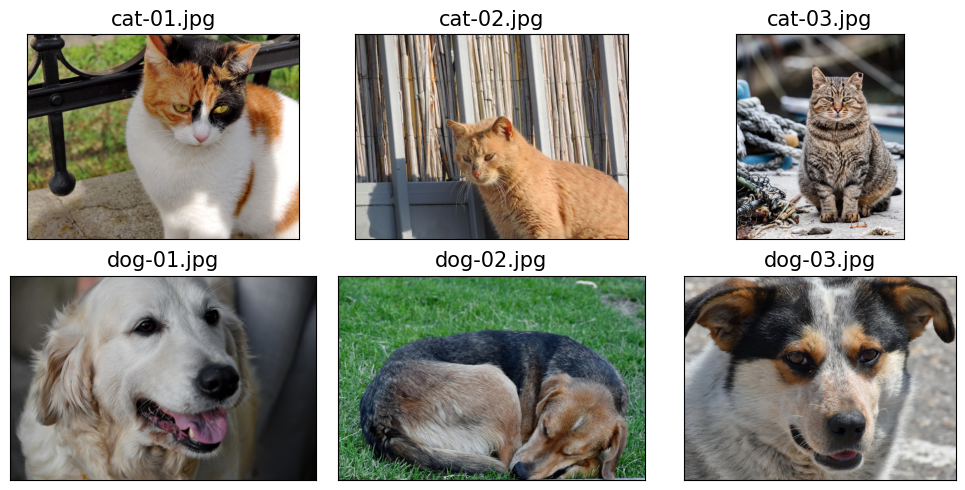

In [45]:
# Wykorzystując Matplotlib oraz PIL, można zwizualizować te pliki
# (wyświetlić obrazy z listy ścieżek do plików):
import matplotlib.pyplot as plt
import os
from PIL import Image  # Importuje klasę Image z biblioteki Pillow (PIL) - do zarządzania obrazami


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [46]:
# Etykiety obrazów znajdują się na ten moment w nazwach plików. Tworzymy etykiety: 1 - dog, 0 - cat:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [47]:
# Mamy dwie listy: listę nazw plików (lub ścieżek) i listę etykiet. Łączymy je:

class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [49]:
! pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


Potrzebne transformacje:
ładowanie obrazu ze ścieżki + dekodowanie + zmiana rozmiaru.

Możliwość zmiany rozmiaru obrazu daje moduł
`torchvision.transforms`.

In [50]:
import torchvision.transforms as transforms  # Moduł transforms zawiera zestaw gotowych transformacji obrazów

img_height, img_width = 80, 120
    
transform = transforms.Compose([  # Tworzy łańcuch transformacji (pipeline)
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

In [51]:
# Dodajemy transform (który zdefiniowaliśmy powyżej) do klasy ImageDataset:

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


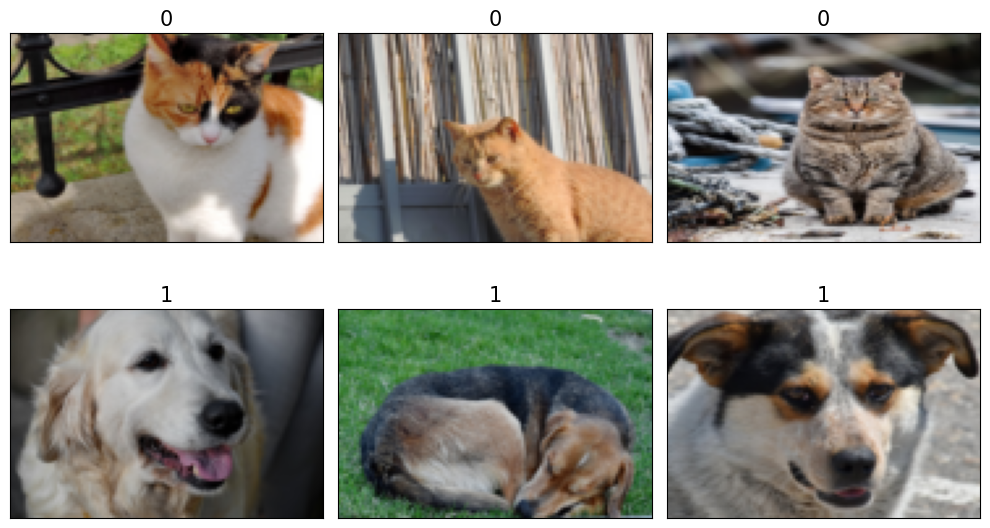

In [127]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

Metoda `__getitem__` z klasy ImageDataset wykonuje cały proces operacji na danych (od załadowania surowych danych do zwrócenia danych gotowych do dalszego procesowania - np. uczenia sieci neuronowej).

### Biblioteka torchvision.datasets

https://pytorch.org/vision/stable/datasets.html

In [129]:
import torchvision

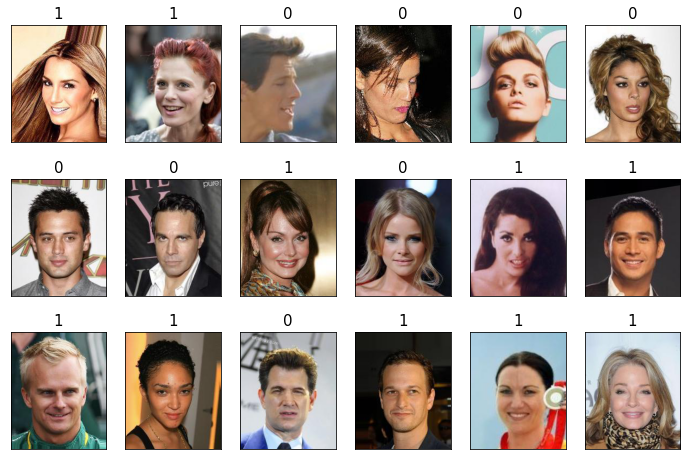

In [49]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
    
#plt.savefig('figures/12_05.pdf')
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x1317A9E80>, 5)


/Users/sebastian/miniforge3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1635217266490/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


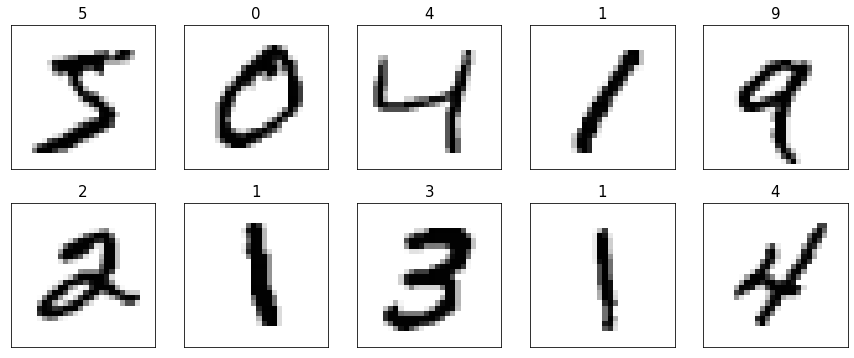

In [50]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()